In [2]:
# Notebook to allow the preview of any frame in a bag file.
# - Allows quick view of sonar image at any fame (side-by-side).
# - Allows quick view of camera image at any frame (side-by-side).
# - Select and view message at a frame.

In [3]:
import rosbag
import numpy as np
import matplotlib.pyplot as plt
import cv_bridge

In [4]:
path = '/media/dberezansky/daniel_data/2021-07-13_sonar_target_size/2021-08-05-16-51-38.bag'
bag = rosbag.Bag(open(path, 'rb'))

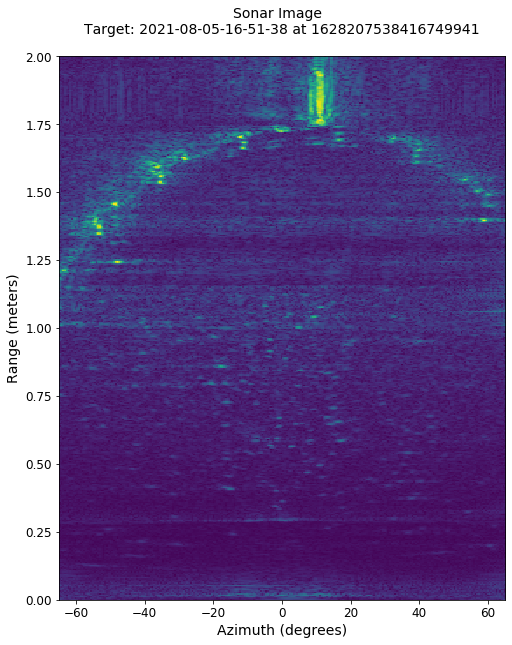

In [5]:
# Task 1 - Plot Sonar Image

# Frame Selection
count = 0
target_count = 400
for topic, message, timestamp in bag.read_messages():
    if topic == '/raven/oculus/sonar_image':
        if count < target_count:
            count += 1
        else:
            break

# Data gathering
data = [int(foo) for foo in message.intensities]
data = np.reshape(data, (-1,256))

# Plot Sonar Image
fig = plt.figure(figsize=(8, 10))
angles = [np.degrees(rad) for rad in message.azimuth_angles]
plt.imshow(data, extent=[np.min(angles), np.max(angles), 0, 2], aspect='auto', origin="lower")
    
# Sonar Image Title
target_path = path.split("/")[-1]
target_file = target_path.split(".")[0]
title = "Sonar Image " + " \nTarget: " + target_file + " at " + str(timestamp) + "\n"
plt.title(title, fontsize=14)

# Label plot
plt.xlabel('Azimuth (degrees)', fontsize=14)
plt.ylabel('Range (meters)', fontsize=14)
plt.tick_params(axis='x', which='both', labelsize=12)
plt.tick_params(axis='y', which='both', labelsize=12)
# plt.colorbar()

# Save sonar image
file_title = "SonarImage." + target_file + "." + str(timestamp) + ".png"
fig.savefig(file_title)

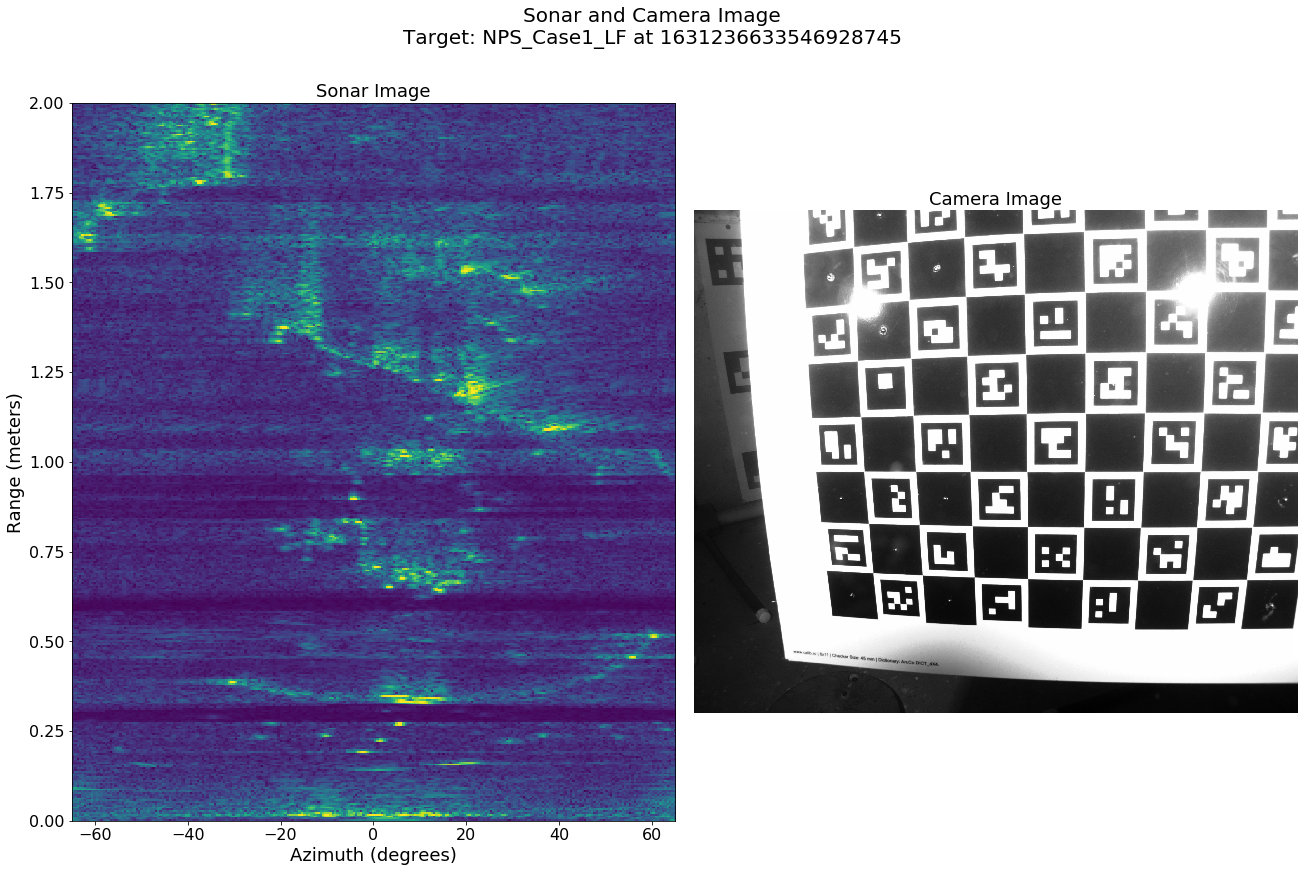

<Figure size 720x720 with 0 Axes>

In [218]:
# Sonar and Camera Image View

import cv_bridge

# Frame Selection
count = 0
target_count = 205
for topic, message, timestamp in bag.read_messages():
    if topic == '/raven/oculus/sonar_image':
        if count < target_count:
            count += 1
        else:
            break

# Data gathering
data = [int(foo) for foo in message.intensities]
data = np.reshape(data, (-1,256))

# Plot
f, ax = plt.subplots(1, 2, figsize=(18,12), constrained_layout='true')
fig = plt.figure(figsize=(10, 10))

# View Sonar Image
angles = [np.degrees(rad) for rad in message.azimuth_angles]
ax[0].imshow(data, extent=[np.min(angles), np.max(angles), 0, 2], aspect='auto', origin="lower")

# View Camera Image
for camera_topic, camera_message, camera_timestamp in bag.read_messages():
    if camera_topic == '/raven/stereo/right/image_raw':
        if int(str(message.header.stamp)) < int(str(camera_message.header.stamp)):
            br = cv_bridge.CvBridge()
            camera_data = br.imgmsg_to_cv2(camera_message, "mono8")
            ax[1].imshow(camera_data, cmap="gray")
            break

# Image Titles
target_path = path.split("/")[-1]
target_file = target_path.split(".")[0]

ax[0].set_title('Sonar Image', fontsize=18)
ax[1].set_title('Camera Image', fontsize=18)
title = "Sonar and Camera Image" + "\nTarget: " + target_file + " at " + str(timestamp) + "\n"
f.suptitle(title, fontsize=20)

# Label plot
ax[0].set_xlabel('Azimuth (degrees)', fontsize=18)
ax[0].set_ylabel('Range (meters)', fontsize=18)
ax[0].tick_params(axis='x', which='both', labelsize=16)
ax[0].tick_params(axis='y', which='both', labelsize=16)
ax[1].axis('off')
plt.tight_layout()
plt.show()

# Save sonar image
file_title = "SonarImage+." + target_file + "." + str(timestamp) + ".png"
f.savefig(file_title)

In [15]:
# Frame Selection
count = 0
target_count = 0
for topic, message, timestamp in bag.read_messages():
    if topic == '/raven/oculus/sonar_image':
        if count < target_count:
            count += 1
        else:
            break

# Data gathering
data = [int(foo) for foo in message.intensities]
data = np.reshape(data, (-1,256))

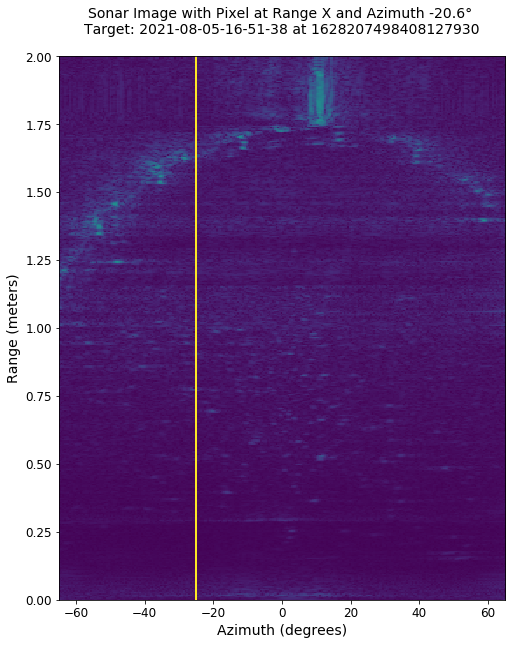

In [16]:
# Pixel Finder

# Data gathering
data = [int(foo) for foo in message.intensities]
data = np.reshape(data, (-1,256))

# Set Azimuth and Range Values
# Set to negative value if no azimuth or range specified.
target_range = -10
target_azimuth = 78
nrows, ncols = data.shape # double check whether cols/rows match to azimuth/range or range/azimuth

max_i = 0
max_a = ''
max_b = ''
max_c = ''
# a = target_azimuth
# for r in np.arange(nrows - target_range):
#     if data[r][a] > max_i:
#         max_i = data[r + target_range][a]
#         max_c = max_b
#         max_b = max_a
#         max_a = 'Intensity: ' + str(max_i) + ' at (' + str(r) + ', ' + str(a) + ')'
# print(max_a)
# print(max_b)
# print(max_c)

# Identify Pixel
final_azimuth = "X"
final_range = "X"
if target_range > -1:
    for a in np.arange(ncols):
        data[target_range][a] = 500
    final_range = str(round(message.ranges[target_range], 2)) + " m"
if target_azimuth > -1:
    for r in np.arange(nrows):
        data[r][target_azimuth] = 500
    final_azimuth = str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "°"
    
# View Sonar Image
fig = plt.figure(figsize=(8, 10))
angles = [np.degrees(rad) for rad in message.azimuth_angles]
plt.imshow(data, extent=[np.min(angles), np.max(angles), 0, 2], aspect='auto', origin="lower")

# Set Title
target_path = path.split("/")[-1]
target_file = target_path.split(".")[0]

title = "Sonar Image with Pixel at Range " + final_range + " and Azimuth " + final_azimuth + " \nTarget: " + target_file + " at " + str(timestamp) + "\n"
plt.title(title, fontsize=14)

# Label plot
plt.xlabel('Azimuth (degrees)', fontsize=14)
plt.ylabel('Range (meters)', fontsize=14)
plt.tick_params(axis='x', which='both', labelsize=12)
plt.tick_params(axis='y', which='both', labelsize=12)
# plt.colorbar()

# Save Plot
save_title = "PixelFinderA" + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "R" + str(round(message.ranges[target_range], 2)) + "." + target_file + ".png"
fig.savefig(save_title)

In [60]:
topic

'/raven/oculus/sonar_image'

In [61]:
message

header: 
  seq: 112367
  stamp: 
    secs: 1631066817
    nsecs: 356160684
  frame_id: "oculus"
frequency: 1196808.5
sound_speed: 0.0
azimuth_beamwidth: 0.010471975430846214
elevation_beamwidth: 0.3490658402442932
azimuth_angles: [-1.1344640254974365, -1.1178834438323975, -1.1018264293670654, -1.0862929821014404, -1.0712831020355225, -1.0566223859786987, -1.0423105955123901, -1.0285224914550781, -1.014909029006958, -1.0014699697494507, -0.988379955291748, -0.9756391048431396, -0.963072657585144, -0.9506808519363403, -0.9386380314826965, -0.9265953302383423, -0.9149015545845032, -0.903382420539856, -0.8920378088951111, -0.8806931376457214, -0.8696975708007812, -0.8587020039558411, -0.8478809595108032, -0.8372344374656677, -0.8265879154205322, -0.8161159157752991, -0.805818498134613, -0.7956956028938293, -0.7855726480484009, -0.7756242752075195, -0.7656759023666382, -0.755902111530304, -0.746128261089325, -0.7365289330482483, -0.7269296646118164, -0.7175048589706421, -0.7080800533294678,

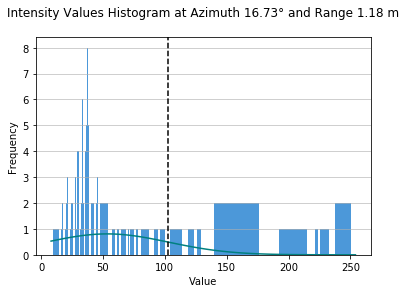

In [249]:
import statistics
from scipy.stats import norm

target_range = 236
target_azimuth = 168

start_image = 200
end_image = 300
frame_count = end_image - start_image
pixel_intensities = np.zeros(frame_count)

index = 0
for noise_topic, noise_message, noise_timestamp in bag.read_messages():
    if noise_topic == '/raven/oculus/sonar_image':
        if index < start_image:
            index += 1
        elif index < end_image:
            noise_data = [int(foo) for foo in noise_message.intensities]
            noise_data = np.reshape(noise_data, (-1,256))
            pixel_intensities[index - start_image] = noise_data[target_range][target_azimuth]
            index += 1
        else:
            break

# Histogram of Intensity Values at Pixel
n, bins, patches = plt.hist(x=pixel_intensities, bins=np.unique(pixel_intensities), color='#006cca',
                            alpha=0.7, rwidth=0.65)

plot_title = "Intensity Values Histogram at Azimuth " + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "° and Range " + str(round(message.ranges[target_range], 2)) + " m\n"
plt.title(plot_title)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')

mean = np.mean(pixel_intensities)
sigma = np.sqrt(np.var(pixel_intensities))
x = np.linspace(min(pixel_intensities), max(pixel_intensities), 100)
plt.plot(x, norm.pdf(x, mean, sigma) * frame_count, color='#008080', linewidth=1.5)

# Statistical Cut-Off Line
plt.axvline(np.mean(pixel_intensities) + np.std(pixel_intensities), color='k', linestyle='dashed', linewidth=1.5)

target_path = path.split("/")[-1]
target_file = target_path.split(".")[0]
file_title = "CompleteHistogramA" + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "R" + str(round(message.ranges[target_range], 2)) + "." + target_file + ".png"
plt.savefig(file_title)

plt.show()

92
127
128
132
149
184


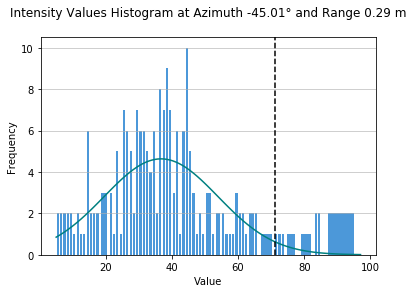

In [241]:
import statistics
from scipy.stats import norm

target_range = 58
target_azimuth = 28

start_image = 0
end_image = 200
frame_count = end_image - start_image
pixel_intensities = np.zeros(frame_count)

index = 0
for noise_topic, noise_message, noise_timestamp in bag.read_messages():
    if noise_topic == '/raven/oculus/sonar_image':
        if index < start_image:
            index += 1
        elif index < end_image:
            noise_data = [int(foo) for foo in noise_message.intensities]
            noise_data = np.reshape(noise_data, (-1,256))
            pixel_intensities[index - start_image] = noise_data[target_range][target_azimuth]
            if noise_data[target_range][target_azimuth] > 80:
                print(index)
            index += 1
        else:
            break

# Histogram of Intensity Values at Pixel
n, bins, patches = plt.hist(x=pixel_intensities, bins=np.unique(pixel_intensities), color='#006cca',
                            alpha=0.7, rwidth=0.65)

plot_title = "Intensity Values Histogram at Azimuth " + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "° and Range " + str(round(message.ranges[target_range], 2)) + " m\n"
plt.title(plot_title)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')

mean = np.mean(pixel_intensities)
sigma = np.sqrt(np.var(pixel_intensities))
x = np.linspace(min(pixel_intensities), max(pixel_intensities), 100)
plt.plot(x, norm.pdf(x, mean, sigma) * frame_count, color='#008080', linewidth=1.5)

# Statistical Cut-Off Line
plt.axvline(np.mean(pixel_intensities) + 2 * np.std(pixel_intensities), color='k', linestyle='dashed', linewidth=1.5)

target_path = path.split("/")[-1]
target_file = target_path.split(".")[0]
file_title = "CompleteHistogramA" + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "R" + str(round(message.ranges[target_range], 2)) + "." + target_file + ".png"
plt.savefig(file_title)

plt.show()

2.220451314576395
8.17
1.8403721626262708
19.13
4.084412349705187
13.62
4.131231136970032
14.94
4.871064845315932
16.9
6.694570391539156
23.47


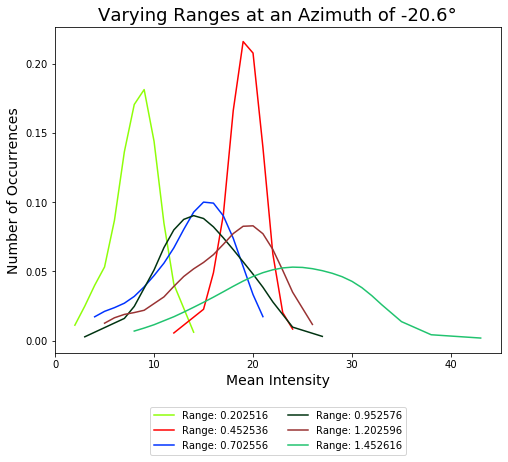

In [17]:
 import statistics
from scipy import stats
from scipy.stats import norm

target_azimuth = 78
range_num = 6
max_images = 100
colors = ['#8ffe09','r','#0033ff','#003311','#993333','#21c36f','#c46210','#ed3cca','#ffbf00','g','#000000'] # a list of colours
nrows, ncols = data.shape # double check whether cols/rows match to azimuth/range or range/azimuth
fig = plt.figure(figsize=(8, 6))

azimuth_title = "Varying Ranges at an Azimuth of " + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "°"
plt.title(azimuth_title, fontsize=18)

for r in np.arange(range_num):
    n_images = 0
    pixel_intensities = np.zeros(max_images)
    
    for noise_topic, noise_message, noise_timestamp in bag.read_messages():
        if noise_topic == '/raven/oculus/sonar_image':
            if n_images < max_images:
                noise_data = [int(foo) for foo in noise_message.intensities]
                noise_data = np.reshape(noise_data, (-1,ncols))
                pixel_intensities[n_images] = noise_data[40 + (r * 20)][target_azimuth]
                n_images += 1
            else:
                break

    print(statistics.stdev(pixel_intensities))
    print(statistics.mean(pixel_intensities))
    
    azimuth_label = "Range: " + str(round(message.ranges[40 + (r * 50)], 6))
    density = stats.gaussian_kde(pixel_intensities)
    bins=np.unique(pixel_intensities)
    # n, bins, patches = plt.hist(x=pixel_intensities, bins=np.unique(pixel_intensities), color=colors[r],
    #                        alpha=0.7, rwidth=0.65, histtype=u'step', density=True)
    plt.plot(bins, density(bins), color=colors[r], label=azimuth_label)
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Mean Intensity', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.show()

file_title = "HistogramA" + str(round(np.degrees(message.azimuth_angles[target_azimuth]), 2)) + "RX.png"
fig.savefig(file_title)